---

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats as st
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import statistics
pd.options.mode.chained_assignment = None 
import calendar
from scipy import stats as st
import math as mth
from matplotlib.pyplot import figure

In [2]:

try:
    
    hypotheses=pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
    orders=pd.read_csv('/datasets/orders_us.csv')
    visits=pd.read_csv('/datasets/visits_us.csv')
except:
    hypotheses=pd.read_csv('datasets/hypotheses_us.csv', sep=';')
    orders=pd.read_csv('datasets/orders_us.csv')
    visits=pd.read_csv('datasets/visits_us.csv')

In [3]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [4]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [7]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
visits['date']=visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders['date']=orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))    

In [9]:
display(visits.isna().any().any())
display(hypotheses.isna().any().any())
display(orders.isna().any().any())

False

False

False

In [10]:
display(visits.duplicated().sum())
display(hypotheses.duplicated().sum())
display(orders.duplicated().sum())

0

0

0

In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [12]:
dupliacted=orders[orders.duplicated(['visitorId'])]
duplicated_values=orders.groupby('visitorId').agg({"group":'nunique'}).reset_index().sort_values('group', ascending=False)
duplicated_values=duplicated_values[duplicated_values['group']>=2]

In [13]:
orders=orders[~orders['visitorId'].isin(duplicated_values['visitorId'])]

In [14]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


## Part 1. Prioritizing Hypotheses

In [15]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [16]:
hypotheses['ICE']=((hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']).round(2)


In [17]:
ice_score=hypotheses[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False).reset_index(drop=True)
ice_score.head()

,Hypothesis,ICE
0,Launch a promotion that gives users discounts ...,16.20
1,Add two new channels for attracting traffic. T...,13.33
2,Add a subscription form to all the main pages....,11.20
3,Show banners with current offers and sales on ...,8.00
4,Add product recommendation blocks to the store...,7.00


In [18]:
hypotheses['RICE']=((hypotheses['Impact']*hypotheses['Confidence']*hypotheses['Reach'])/hypotheses['Effort']).round(2)


In [19]:
rice_score=hypotheses[['Hypothesis', 'RICE']].sort_values('RICE', ascending=False).round(2)
rice_score.head()

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2


There is a little difference between Ice and Rice. So that In rice we have to take into consideration the 'REACH' parameter, Therefore ICE and RICE could show different results. In our example, The 'REACH' of 'Add a subscription form to all the main pages' is very high. Because every user can use that, Therefore  This Hypothesis is very high

### Analyze the A/B test:


In [20]:
datesGroups=orders[['date', 'group']].drop_duplicates()

In [21]:
ordersAggregated=datesGroups.apply(lambda x: orders[np.logical_and(orders['date']<=x['date'],
                                                                   orders['group']==x['group'])].agg({'date':'max','group':'max', 'transactionId':'nunique',
                                                                                                      'visitorId':'nunique', 'revenue':'sum'}), 
                                   axis=1).sort_values(by=['date', 'group'])

In [22]:
visitorsAggregated =datesGroups.apply(lambda x: visits[np.logical_and(visits['date']<=x['date'],
                                                                     visits['group']==x['group'])].agg({'date':'max', 'group':'max', 'visits':'sum'}), axis=1).sort_values(by=['date', 'group'])

In [23]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [24]:
cumulativeData.columns=['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [25]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [26]:
cumulativeRevenueA =cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

In [27]:
cumulativeRevenueB =cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

### Graph cumulative revenue by group. Make conclusions and conjectures.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


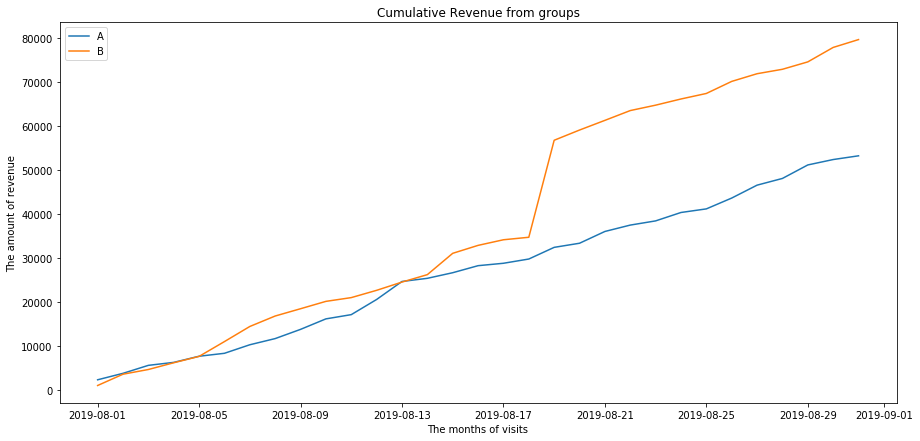

In [28]:
fig = plt.figure(figsize=(15,7))
ax = fig.gca()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
ax.set_title('Cumulative Revenue from groups')
ax.set_xlabel('The months of visits')
ax.set_ylabel('The amount of revenue')
plt.legend() 

Revenue is rising steadily throughout the whole test.


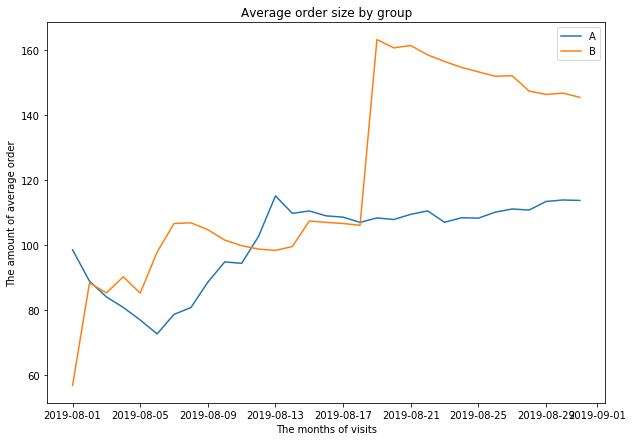

In [29]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
ax.set_title('Average order size by group')
ax.set_xlabel('The months of visits')
ax.set_ylabel('The amount of average order')

plt.legend();

We here also see that the average order size by the group also increases through the time period. , The group B had a dramatic increase in 2019 08 17, but after this period, it starts to decrease, I think this is maybe just a casual reason, or seasonally , a particular day 

In [30]:

mergedCumulativeRevenue=cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',right_on='date',  how='left', suffixes=['A', 'B'])

In [31]:
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


No handles with labels found to put in legend.


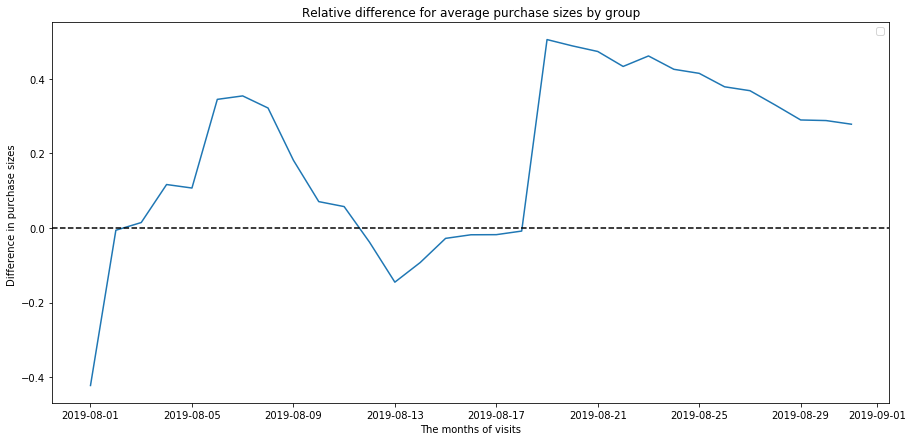

In [32]:
fig = plt.figure(figsize=(15,7))
ax = fig.gca()

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') ;
ax.set_title('Relative difference for average purchase sizes by group')
ax.set_xlabel('The months of visits')
ax.set_ylabel('Difference in purchase sizes ')

plt.legend();

There are fluctuations in revenue of these two groups, Therefore, I would like to continue the text a little while to see that if B revenue will decrease. If it will continue like this, increasing and decreasing, it means this change is related to other factors such as seasonal or other things. It means that there is no difference between control and treatment groups 

In [33]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [34]:
cumulativeData['conversion']=cumulativeData['orders']/cumulativeData['visitors']

In [35]:
cumulativeDataA=cumulativeData[cumulativeData['group']=='A']
cumulativeDataB=cumulativeData[cumulativeData['group']=='B']

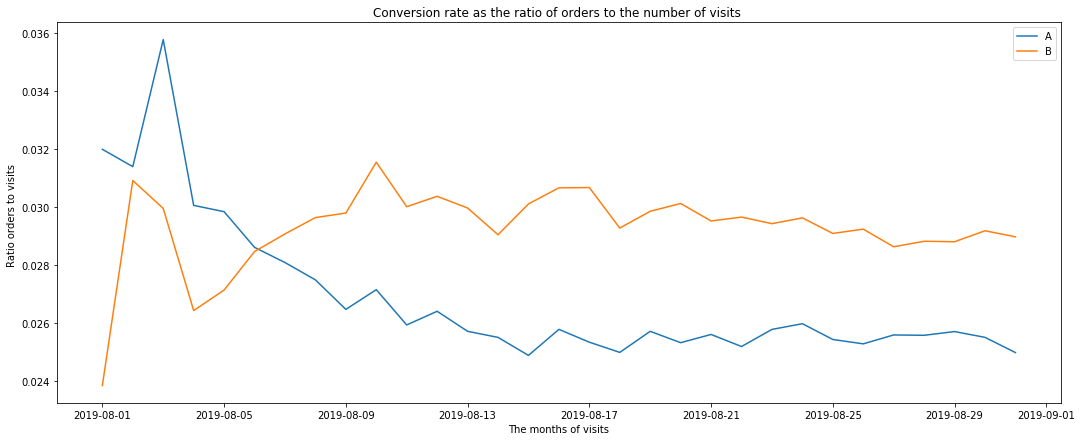

In [36]:
fig = plt.figure(figsize=(18,7))
ax = fig.gca()

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

ax.set_title('Conversion rate as the ratio of orders to the number of visits ')
ax.set_xlabel('The months of visits')
ax.set_ylabel('Ratio orders to visits ')
plt.legend();


The conversion rate between group A and group B  are significantly different, we can say that in 2019 -08-05, there are a huge increase in group b  but the conversion rate in the A group decreasing gradually but there is a decrease after the 2019-08-09 group B conversion rate also decrease. In means that the revenue for  users is significantly more than, and we can say that the buyers in group b are more loyal than group A 

In [37]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], on ='date', suffixes=['A', 'B'])

In [38]:
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


No handles with labels found to put in legend.


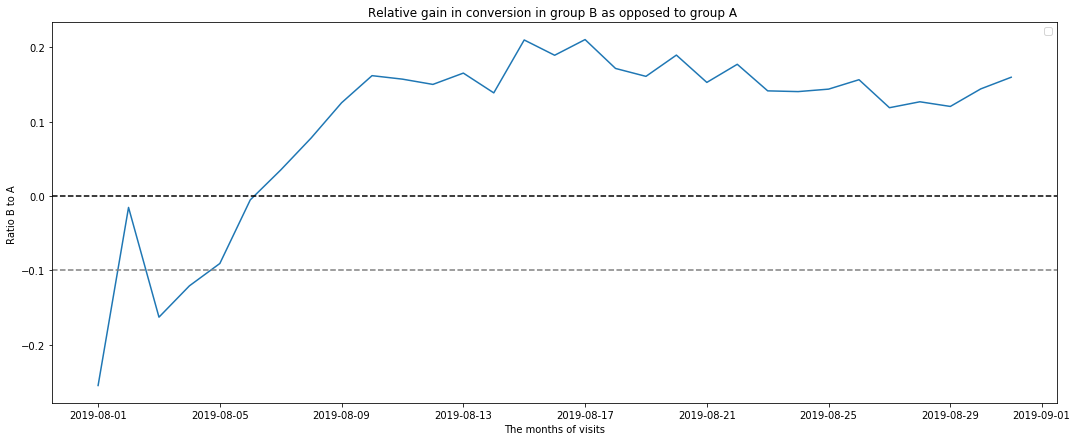

In [39]:
fig = plt.figure(figsize=(18,7))
ax = fig.gca()
plt.plot(mergedCumulativeConversions['date'], (mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1))
         
ax.set_title('Relative gain in conversion in group B as opposed to group A ')
ax.set_xlabel('The months of visits')
ax.set_ylabel('Ratio B to A ')
plt.legend();
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')


The relative conversion rate for group B is significantly more than group A, I think that here We can make a decision to stop the experiment. The conclusion is that the conversion rate is in Group A is more than Group B .

In [40]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


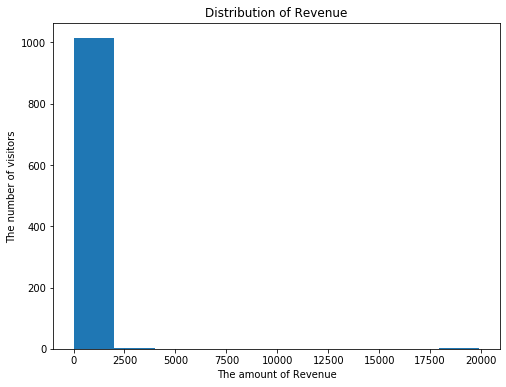

In [41]:

fig = plt.figure(figsize=(8,6))
ax = fig.gca()
plt.hist(orders['revenue'])
ax.set_title('Distribution of Revenue')
ax.set_xlabel('The amount of Revenue')
ax.set_ylabel('The number of visitors');

The graph shows that the amount of revenue for most users is between 0 and 2500. I mean there are not many outliers in the dataset

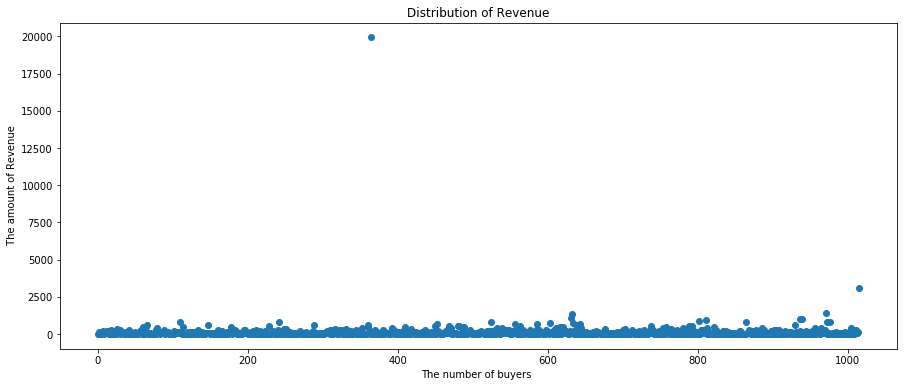

In [42]:
fig = plt.figure(figsize=(15,6))
ax = fig.gca()
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
ax.set_title('Distribution of Revenue')
ax.set_xlabel('The number of buyers ')
ax.set_ylabel(' The amount of Revenue');

The scatter chart shows that there are not many outliers just 1 buyer 20000 as an exception.

In [43]:
print(np.percentile(orders['revenue'], [95, 97.5, 99]))

[414.275 578.75  830.3  ]


But is bettter to look at the 95 and 99 percentile . 

In [44]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [45]:
ordersByUsers=orders[['transactionId','visitorId']].groupby('visitorId').agg({'transactionId':'nunique'}).reset_index()

In [46]:
ordersByUsers.columns = ['users', 'orders']


In [47]:
ordersByUsers.head()

,users,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


In [48]:
ordersByUsers.sort_values('orders', ascending=False).head(10)


,users,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


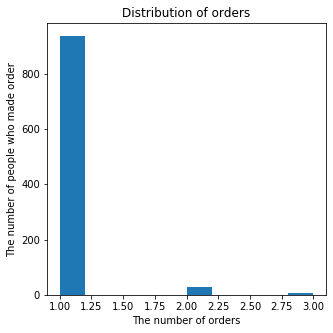

In [49]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
plt.hist(ordersByUsers['orders']) 
ax.set_title('Distribution of orders')
ax.set_xlabel('The number of orders')
ax.set_ylabel('The number of people who made order');

Most of the number of orders is mainly  is 1 

Text(0, 0.5, ' The number of order')

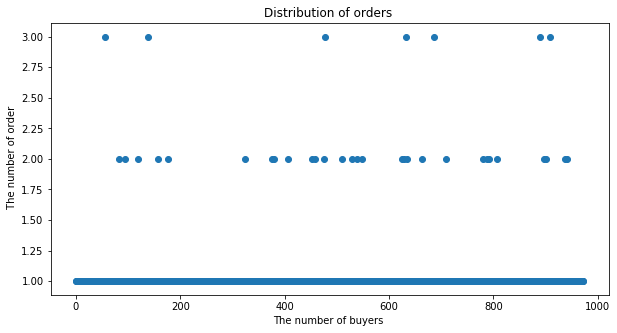

In [50]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
x_values=pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
ax.set_title('Distribution of orders ')
ax.set_xlabel('The number of buyers ')
ax.set_ylabel(' The number of order')

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Titles, axes captions?
</div>


<div class="alert alert-warning">
<b>Reviewer's comment: </b> By the way, you can improve scatter plots by coloring them in AB group colors:<br><a>https://moonbooks.org/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/
</a>
</div>

In [51]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


The scatter and percentile shows that most of order 1 and 99 percentile is 2, more than 2 I will take as abnormal 

In [52]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [53]:
ordersByUsersA=orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns=['userId', 'orders']

In [54]:
ordersByUsersA.head()

,userId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [55]:
ordersByUsersB=orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['userId', 'orders'] 

In [56]:
ordersByUsersA.head(2)

,userId,orders
0,11685486,1
1,54447517,1


In [57]:
ordersByUsersB.head(2)

,userId,orders
0,5114589,1
1,6958315,1


In [58]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [59]:
zeroes_A=visits[visits['group']=='A']['visits'].sum()-len(ordersByUsersA['orders'])
series_A=pd.Series(0, index=np.arange(zeroes_A))
sampleA=pd.concat([ordersByUsersA['orders'],series_A ], axis=0)
sampleA.name='orders'

In [60]:
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

In [61]:
zeroes_B=visits[visits['group']=='B']['visits'].sum()-len(ordersByUsersA['orders'])
series_B=pd.Series(0, index=np.arange(zeroes_B))
sampleB=pd.concat([ordersByUsersB['orders'],series_B ], axis=0)
sampleB.name='orders'

 H0:Our Null hypothesis  is that there is no statistical significance of the difference in conversion between the groups.\
 H1:alternative is that they are significant difference between 2 groups  /
 alpha level is 0.05 and it will be two-sided test . It means that we compare just to see the  means od two groups  whether  the same is 
 

In [62]:
p=stats.mannwhitneyu(sampleA, sampleB,  alternative='two-sided')[1]
alpha = 0.05
if p > alpha:
	print("We can't reject the null hypothesis")
else:
	print("We reject the null hypothesis")

We reject the null hypothesis


In [63]:
p

0.0134018156887569

So the results is tha there is  statistical significance of the difference in conversion between the groups. 

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Note, that you need to specify 'two-sided' type of alternative hypothesis. Check this link: <a>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html</a>
    
This issue is actual for every test.    
</div>

In [64]:
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 


0.155


and the mean of B conversion rate is about 15 percent more than that of A

For revenue amount   of two groups :\
H0:Our Null hypothesis  is that there is no statistical significance of the difference in amount of revenue  in the groups.\
H1:alternative is that they are significant difference between 2 groups  /
Alpha level is 0.05 and it will be two-sided test . It means that we compare just to see the  means od two groups  whether  the same is 

    

In [65]:
p1=stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')[1]
alpha = 0.05
if p1 > alpha:
	print("We can't reject the null hypothesis")
else:
	print("We reject the null hypothesis")

We can't reject the null hypothesis


In [66]:
p1

0.8622329690015668

So the results is that  there is no statistical significance of the difference in revenue  between the groups. 

In [67]:
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.278


and the mean of B revenue  is about 27 percent more than that of A

In [68]:
sampleB = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)


In [69]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0).reset_index(drop=True)


In [70]:
usersWithExpensiveOrders = orders[orders['revenue'] > 831]['visitorId'].reset_index(drop=True)

In [71]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values().reset_index(drop=True)


In [72]:
ordersByUsersA.head()

,userId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [73]:
sampleAFiltered= pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']
                                                                                                                                                   ['visits'].sum() - len(ordersByUsersA['orders'])),
                                                                                                                                name='orders')],axis=0)


In [74]:
sampleAFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18726, dtype: int64

In [75]:
sampleBFiltered= pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']
                                                                                                                                                   ['visits'].sum() - len(ordersByUsersA['orders'])),
                                                                                                                                name='orders')],axis=0)


 H0:Our Null hypothesis  is that there is no statistical significance of the difference in conversion between the groups.\
 H1:alternative is that they are significant difference between 2 groups  \
 alpha level is 0.05 and it will be two-sided test . It means that we compare just to see the  means od two groups  whether  the same is 

In [76]:
p2=stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]
alpha = 0.05
if p2 > alpha:
	print("We can't reject the null hypothesis")
else:
	print("We reject the null hypothesis")

We can't reject the null hypothesis


In [77]:
p2

0.8864959321737214

The result is that  there is no statistical significance of the difference in conversion between the groups
So our p values are more than 0.05 there are we can say that groups do not differ significantly. After deleting the outliers p-value is 
more than 0.05. So we can say that outliers have a big influence on groups. Because the first test and this differ each other significantly

In [78]:
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

-0.010


But we see that after deleting outliers B conversion is less than that A about 1 percent.

In [79]:
filtered_A=orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]


In [80]:
filtered_B=orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]

In [85]:
filtered_B

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1181,1303723408,3218863961,2019-08-14,390.5,B
1186,2116724386,2146711261,2019-08-14,240.6,B
1190,38478481,1197745035,2019-08-14,135.3,B
1191,3592955527,608641596,2019-08-14,255.7,B


For revenue amount   of two groups :\
H0:Our Null hypothesis  is that there is no statistical significance of the difference in amount of revenue  in the groups.\
H1:alternative is that they are significant difference between 2 groups  /
Alpha level is 0.05 and it will be two-sided test . It means that we compare just to see the  means od two groups  whether  the same is 


In [86]:
mannwhitneyu=stats.mannwhitneyu(filtered_A['revenue'],filtered_B['revenue'], alternative='two-sided')[1].round(2)
alpha = 0.05
print(p)
if mannwhitneyu > alpha:
	print("We can't reject the null hypothesis")
else:
	print("We reject the null hypothesis")

0.0134018156887569
We can't reject the null hypothesis


In [82]:
mannwhitneyu

0.82

The result is that there is no statistical significance of the difference in revenue  between the groups .So our p values are more than 0.05 there are we can say that groups are not different significantly,We see that after deleting outliers, the difference between the two groups did not change, so the data does not contain the big outliers. 

No handles with labels found to put in legend.


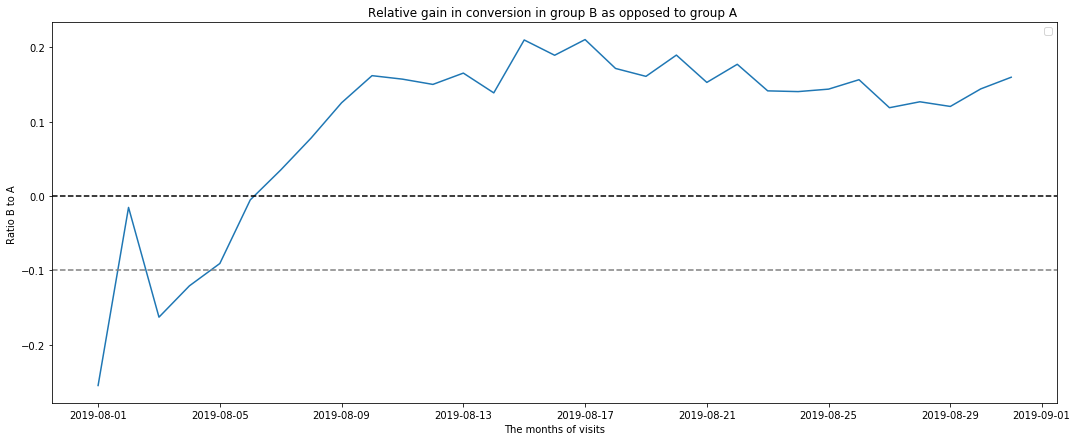

In [83]:
fig = plt.figure(figsize=(18,7))
ax = fig.gca()
plt.plot(mergedCumulativeConversions['date'], (mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1))
         
ax.set_title('Relative gain in conversion in group B as opposed to group A ')
ax.set_xlabel('The months of visits')
ax.set_ylabel('Ratio B to A ')
plt.legend();
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');

No handles with labels found to put in legend.


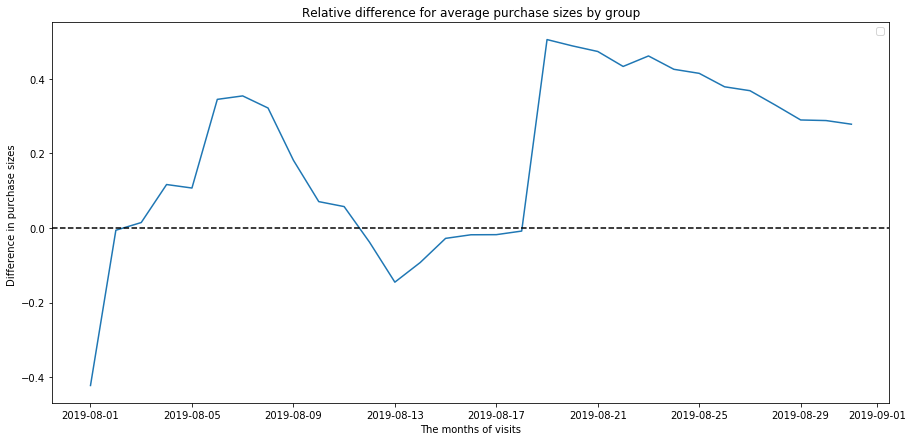

In [84]:
fig = plt.figure(figsize=(15,7))
ax = fig.gca()

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') ;
ax.set_title('Relative difference for average purchase sizes by group')
ax.set_xlabel('The months of visits')
ax.set_ylabel('Difference in purchase sizes ')

plt.legend();

In a conclusion, we can say that. Neither raw nor filtered data revealed any statistically significant differences in conversion between the groups. in both cases, the p-value is more than 0.05. Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups. The graph showing the difference in conversion between the groups tells us that group B's results are better and it seems that it will continue like this but  Average purchase size is a little complicated because, b is better than a but in the past, there was some fluctuation and it could happen in the future also that is why I think it is better to continue the test a little more. But the probability is not so large therefore, Considering the significance level and conversion rate, it is better to stop the test and tell that group B is better than group A 

<div class="alert alert-success">
<b>Reviewer's comment:</b> Thank you for the detailed analysis!
</div>